In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# from library.sb_utils import save_file

In [3]:
full_data = pd.read_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\Dataset1.csv")
CO_emissions = pd.read_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\Dataset2.csv")

## First Dataset<a id='First Dataset'></a>

First dataset is compiled from datasets acquired from Berkeley Earth. 

https://www.kaggle.com/derevirn/data-analysis-on-climate-change/data

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [4]:
full_data.head()

Year  Month  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)  \
0  1958      1            349.197091                     349.176182   
1  1958      2            350.530000                     349.862963   
2  1958      3            315.690000                     314.420000   
3  1958      4            317.450000                     315.150000   
4  1958      5            317.500000                     314.730000   

   Carbon Dioxide Fit (ppm)  Seasonally Adjusted CO2 Fit (ppm)  \
0                349.193818                         349.161091   
1                349.963818                         349.287091   
2                316.180000                         314.890000   
3                317.300000                         314.980000   
4                317.830000                         315.060000   

   LandAverageTemperature  LandAverageTemperatureUncertainty  \
0                   3.574                              0.114   
1                   3.695                              0.173   
2                   5.453                              0.084   
3                   8.520                              0.103   
4                  11.519                              0.089   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0               8.977                          0.063              -1.772   
1               9.546                          0.234              -1.949   
2              11.321                          0.173              -0.549   
3              14.392                          0.157               2.570   
4              17.355                          0.185               5.625   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                          0.202                          13.881   
1                          0.188                          14.071   
2                          0.202                          14.547   
3                          0.083                          15.359   
4                          0.286                          16.180   

   AverageTemperature_US  AverageTemperatureUncertainty_US  
0                 -2.776                             0.252  
1                 -2.256                             0.250  
2                  1.449                             0.160  
3                  8.144                             0.236  
4                 14.859                             0.301

In [5]:
full_data.describe().drop(columns=["Year", "Month"]).T

count        mean        std      min  \
Carbon Dioxide (ppm)               669.0  349.368544  23.841972  313.210   
Seasonally Adjusted CO2 (ppm)      669.0  349.352855  23.747085  314.420   
Carbon Dioxide Fit (ppm)           669.0  349.125124  23.990867  312.450   
Seasonally Adjusted CO2 Fit (ppm)  669.0  349.109893  23.902462  314.890   
LandAverageTemperature             669.0    9.013332   4.157471    1.882   
LandAverageTemperatureUncertainty  669.0    0.089738   0.031922    0.034   
LandMaxTemperature                 669.0   14.711640   4.260889    7.229   
LandMaxTemperatureUncertainty      669.0    0.129105   0.051269    0.044   
LandMinTemperature                 669.0    3.392395   4.050326   -3.549   
LandMinTemperatureUncertainty      669.0    0.139413   0.059523    0.045   
LandAndOceanAverageTemperature     669.0   15.504245   1.235042   13.298   
AverageTemperature_US              669.0    9.156220   8.896548   -6.620   
AverageTemperatureUncertainty_US   669.0    0.177758   0.074593    0.053   

                                       25%      50%      75%      max  
Carbon Dioxide (ppm)               327.750  347.430  368.610  399.980  
Seasonally Adjusted CO2 (ppm)      327.350  347.180  368.560  396.910  
Carbon Dioxide Fit (ppm)           327.360  346.650  368.650  399.590  
Seasonally Adjusted CO2 Fit (ppm)  326.870  346.470  368.550  397.010  
LandAverageTemperature               4.873    9.318   13.154   15.482  
LandAverageTemperatureUncertainty    0.068    0.084    0.104    0.267  
LandMaxTemperature                  10.475   15.057   18.954   21.320  
LandMaxTemperatureUncertainty        0.093    0.118    0.154    0.518  
LandMinTemperature                  -0.685    3.586    7.412    9.715  
LandMinTemperatureUncertainty        0.097    0.129    0.162    0.456  
LandAndOceanAverageTemperature      14.327   15.498   16.675   17.609  
AverageTemperature_US                0.886    9.211   18.198   23.008  
AverageTemperatureUncertainty_US     0.129    0.170    0.215    1.210

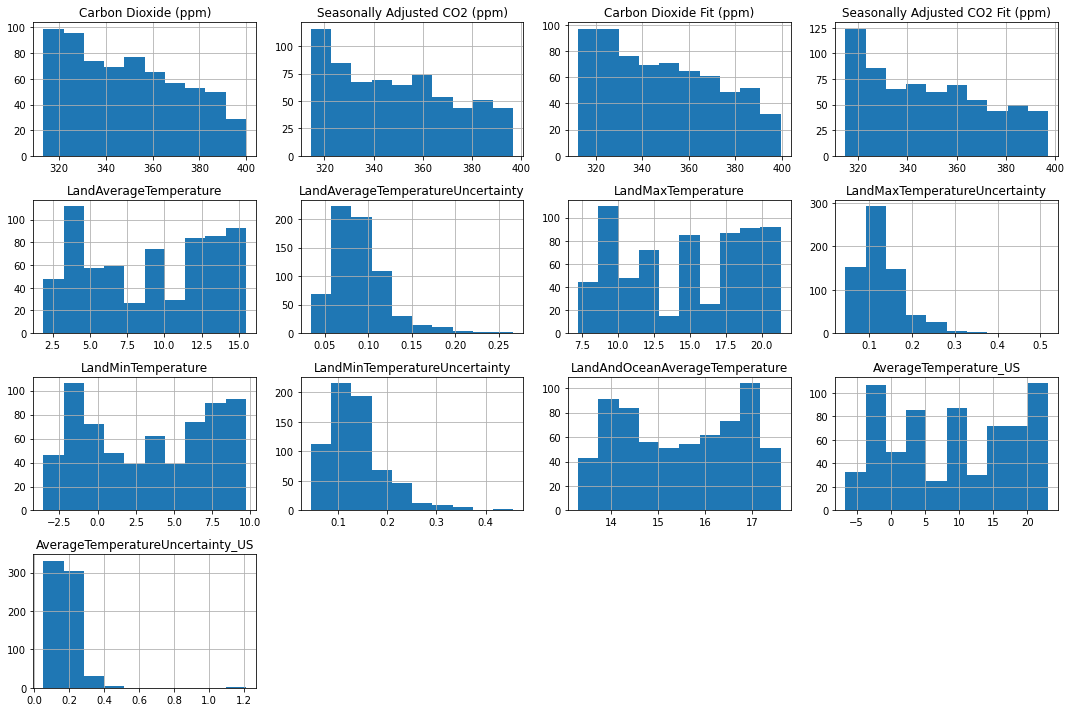

In [6]:
hist = full_data.drop(columns=["Year", "Month"]).hist(bins=10,figsize =(15,10))
plt.tight_layout()

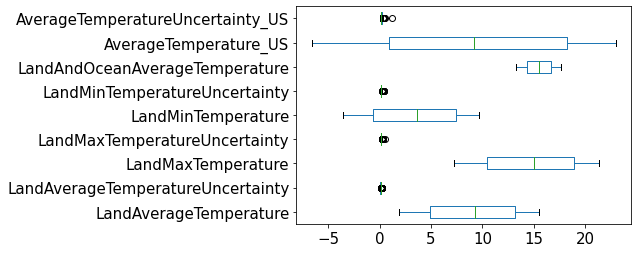

In [7]:
column_names = ["Year", "Month", "Carbon Dioxide (ppm)", 
                "Seasonally Adjusted CO2 (ppm)", "Carbon Dioxide Fit (ppm)", 
                "Seasonally Adjusted CO2 Fit (ppm)"]

boxplot = full_data.drop(columns=column_names).boxplot(grid=False, vert=False,fontsize=15)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Month'),
  Text(0, 2.5, 'Carbon Dioxide (ppm)'),
  Text(0, 3.5, 'Seasonally Adjusted CO2 (ppm)'),
  Text(0, 4.5, 'Carbon Dioxide Fit (ppm)'),
  Text(0, 5.5, 'Seasonally Adjusted CO2 Fit (ppm)'),
  Text(0, 6.5, 'LandAverageTemperature'),
  Text(0, 7.5, 'LandAverageTemperatureUncertainty'),
  Text(0, 8.5, 'LandMaxTemperature'),
  Text(0, 9.5, 'LandMaxTemperatureUncertainty'),
  Text(0, 10.5, 'LandMinTemperature'),
  Text(0, 11.5, 'LandMinTemperatureUncertainty'),
  Text(0, 12.5, 'LandAndOceanAverageTemperature'),
  Text(0, 13.5, 'AverageTemperature_US'),
  Text(0, 14.5, 'AverageTemperatureUncertainty_US')])

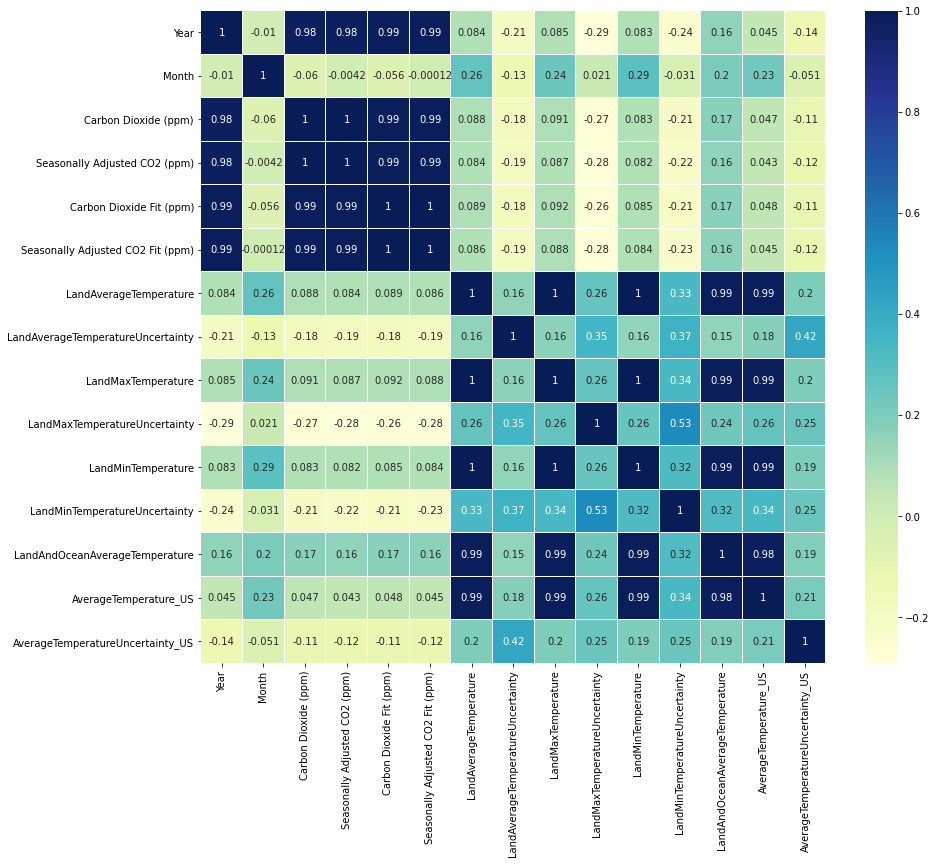

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(full_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 [Text(0, 0.5, 'year'),
  Text(0, 1.5, 'co2'),
  Text(0, 2.5, 'co2_growth_prct'),
  Text(0, 3.5, 'co2_growth_abs'),
  Text(0, 4.5, 'co2_per_capita'),
  Text(0, 5.5, 'share_global_co2'),
  Text(0, 6.5, 'cumulative_co2'),
  Text(0, 7.5, 'share_global_cumulative_co2'),
  Text(0, 8.5, 'co2_per_gdp'),
  Text(0, 9.5, 'coal_co2'),
  Text(0, 10.5, 'cement_co2'),
  Text(0, 11.5, 'flaring_co2'),
  Text(0, 12.5, 'gas_co2'),
  Text(0, 13.5, 'oil_co2'),
  Text(0, 14.5, 'cement_co2_per_capita'),
  Text(0, 15.5, 'coal_co2_per_capita'),
  Text(0, 16.5, 'flaring_co2_per_capita'),
  Text(0, 17.5, 'gas_co2_per_capita'),
  Text(0, 18.5, 'oil_co2_per_capita'),
  Text(0, 19.5, 'share_global_cement_co2'),
  Text(0, 20.5, 'share_global_coal_co2')

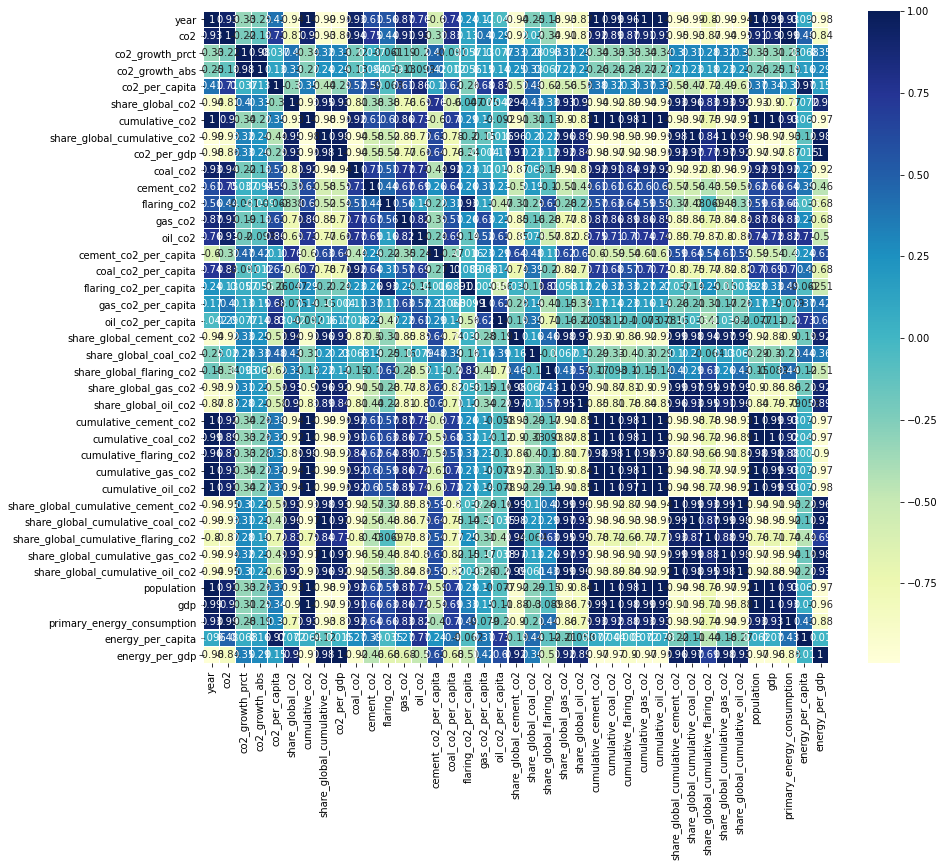

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(CO_emissions.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

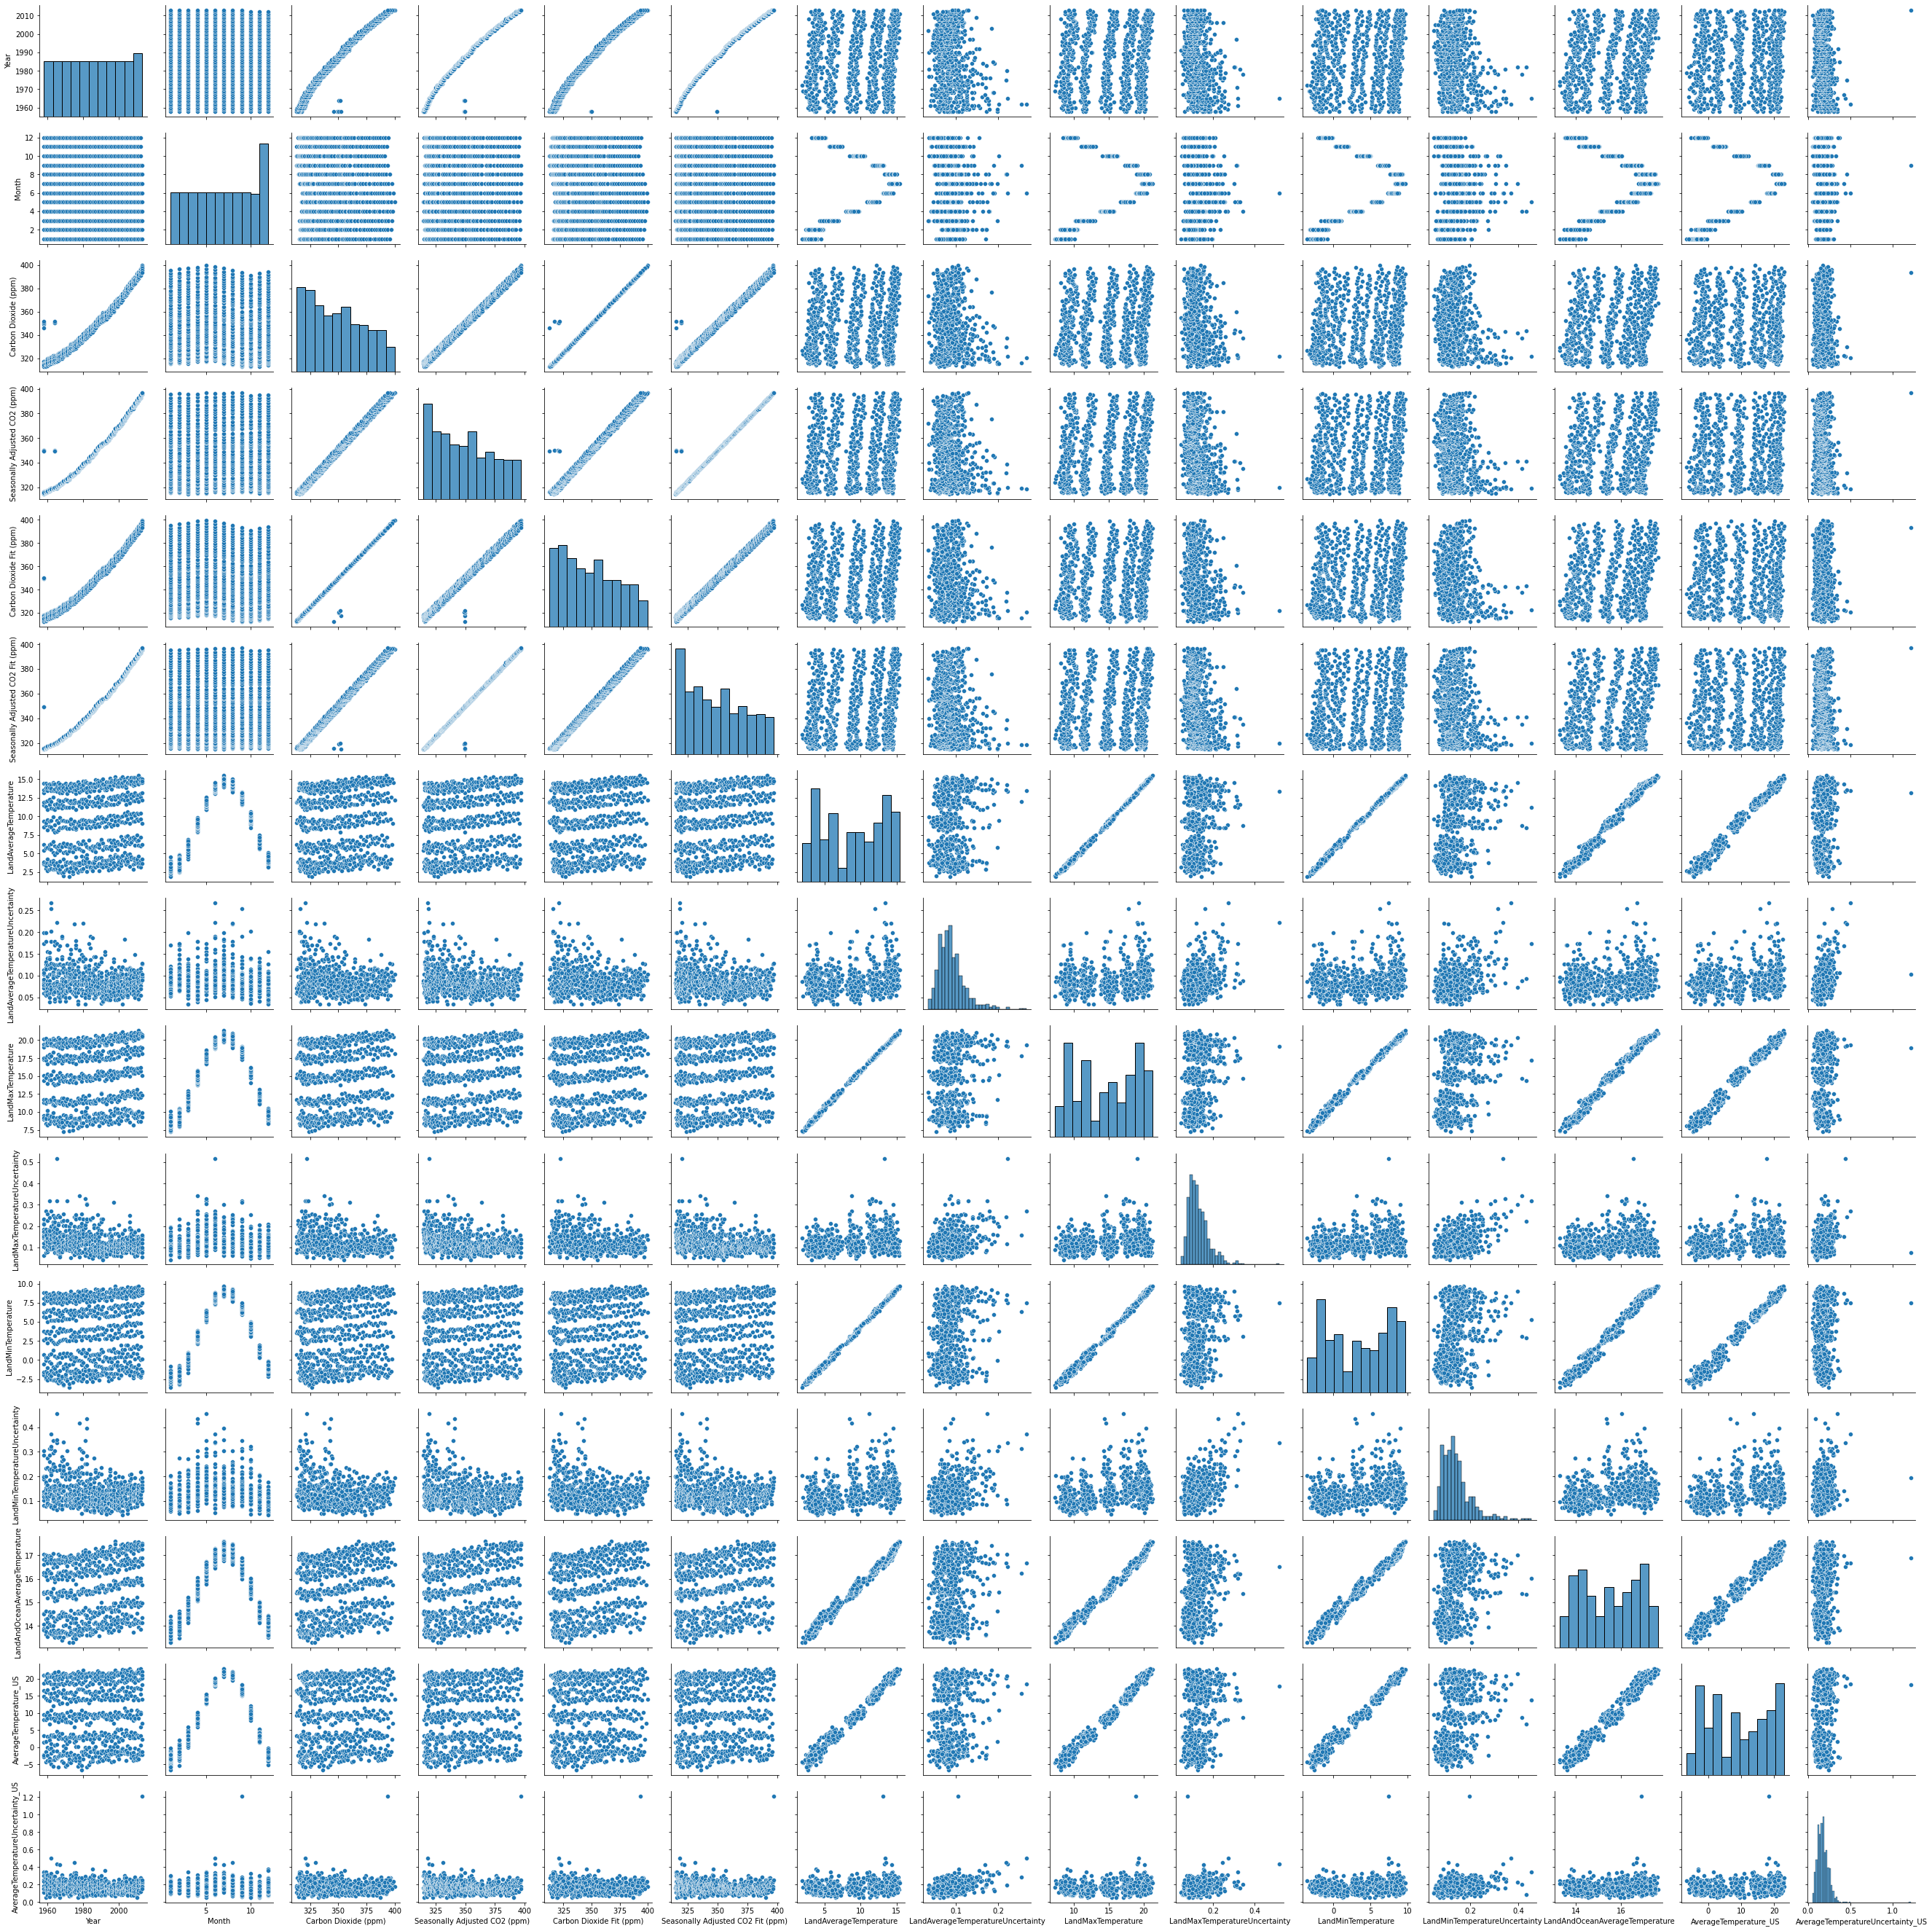

In [10]:
g = sns.pairplot(full_data)

In [11]:
frames = []

for i in range(1957, 2014):
    avg_i = full_data[full_data["Year"] == i].groupby(by="Year").mean().drop(columns="Month")
    frames.append(avg_i)

avg_all = pd.concat(frames)
avg_all.reset_index().head()

Year  Carbon Dioxide (ppm)  Seasonally Adjusted CO2 (ppm)  \
0  1958            326.717835                     326.714894   
1  1959            315.981667                     315.976667   
2  1960            316.908333                     316.906667   
3  1961            317.645000                     317.640000   
4  1962            318.453333                     318.448333   

   Carbon Dioxide Fit (ppm)  Seasonally Adjusted CO2 Fit (ppm)  \
0                320.904803                         320.894848   
1                315.998333                         315.994167   
2                316.905833                         316.905000   
3                317.629167                         317.625000   
4                318.455000                         318.450000   

   LandAverageTemperature  LandAverageTemperatureUncertainty  \
0                8.773750                           0.104333   
1                8.732667                           0.107167   
2                8.583750                           0.093500   
3                8.797667                           0.097000   
4                8.745917                           0.132917   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           14.477500                       0.161000            3.114500   
1           14.416500                       0.150083            3.108583   
2           14.317417                       0.149417            2.932583   
3           14.514917                       0.165750            3.128750   
4           14.540167                       0.158917            3.008583   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       0.172583                       15.382083   
1                       0.149167                       15.340500   
2                       0.137583                       15.291917   
3                       0.181750                       15.379917   
4                       0.204417                       15.325583   

   AverageTemperature_US  AverageTemperatureUncertainty_US  
0               8.970167                          0.232583  
1               8.825333                          0.209083  
2               8.692250                          0.180250  
3               8.642000                          0.187250  
4               8.956500                          0.238250

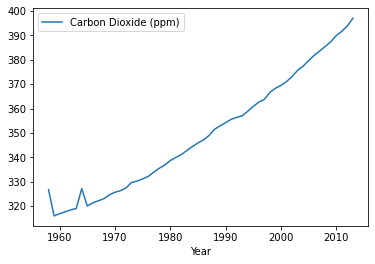

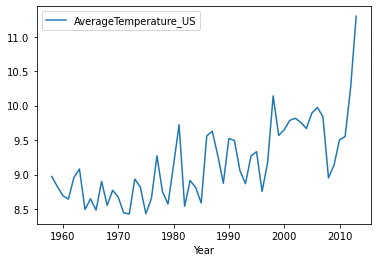

In [12]:
ax = avg_all.plot(kind='line', y="Carbon Dioxide (ppm)")
bx = avg_all.plot(kind='line', y="AverageTemperature_US")
# plt.tight_layout()

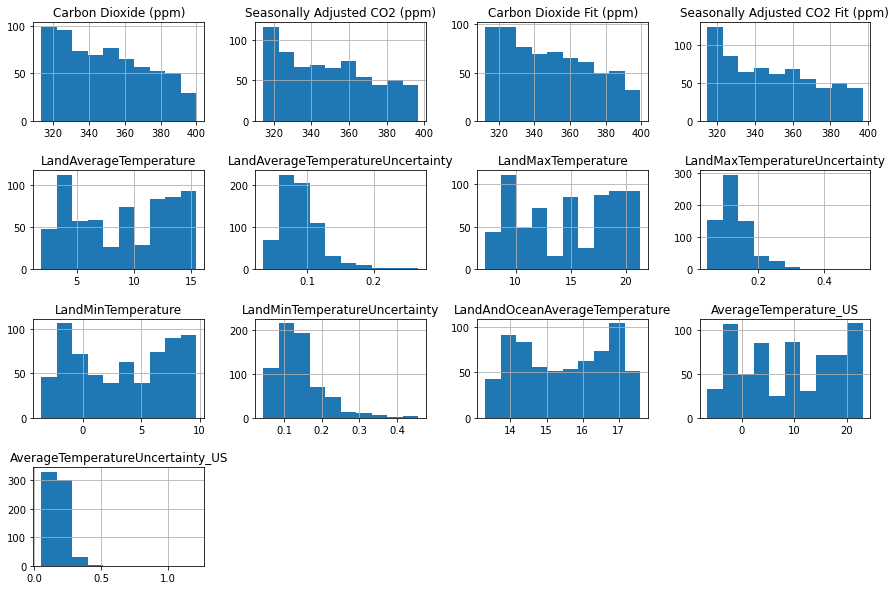

In [13]:
full_data.drop(columns=["Year", "Month"]).hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)